**Women Cloth Reviews Prediction with Multinomial NAIVE BAYES.**

The multinomial Naive Bayes classifier is suitable for classsification with discrete features(e.g. word counts for text classification). The multinomial distribution normally requires integer feature counts (can take fractions also).

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Dataset**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv")
df

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [5]:
df.shape

(23486, 10)

In [6]:
df.describe

<bound method NDFrame.describe of        Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                             

# **Missing Values**
**Removing missing values in Reviews columns with no Review text.**

In [7]:
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                845
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [8]:
df[df['Review']==""]=np.NaN

In [9]:
df['Review'].fillna("No Review",inplace=True)

In [10]:
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                  0
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [11]:
df['Review']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review, Length: 23486, dtype: object

# **Define Target (y) and Feature (X)**

In [12]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

In [13]:
X = df['Review']

In [14]:
y = df['Rating']

In [15]:
df['Rating'].value_counts()

5.0    13131
4.0     5077
3.0     2871
2.0     1565
1.0      842
Name: Rating, dtype: int64

# **Train Test Split**

In [16]:
from sklearn.model_selection import train_test_split

* In statistics and data analysis, "stratify" refers to the process of dividing a population or dataset into distinct subgroups or strata based on specific characteristics or attributes.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, stratify = y, random_state=2529)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

# **Get Feature Text Conversion to Tokens**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer(lowercase = True, analyzer='word', ngram_range=(2,3), stop_words = 'english', max_features=5000)

In [21]:
X_train = cv.fit_transform(X_train)

In [22]:
cv.get_feature_names_out()

array(['10 12', '10 bought', '10 fit', ..., 'yellow color', 'yoga pants',
       'zipper little'], dtype=object)

In [23]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
X_test = cv.fit_transform(X_test)

In [25]:
cv.get_feature_names_out()

array(['10 12', '10 dress', '10 fit', ..., 'years come', 'years old',
       'yoga pants'], dtype=object)

In [26]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Get Model train**

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
model = MultinomialNB()

In [29]:
model.fit(X_train, y_train)

MultinomialNB()

# **Get Model Prediction**

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred.shape

(7046,)

In [32]:
y_pred

array([1., 5., 5., ..., 5., 5., 5.])

# **Get Probability of each predicted class**

In [33]:
model.predict_proba(X_test)

array([[0.71118473, 0.02625165, 0.15465118, 0.01496876, 0.09294369],
       [0.02416867, 0.04769471, 0.35268622, 0.16185007, 0.41360034],
       [0.03582725, 0.06660584, 0.12226277, 0.21618005, 0.55912409],
       ...,
       [0.02320281, 0.08950939, 0.08962183, 0.16719203, 0.63047394],
       [0.01167675, 0.00202714, 0.08539004, 0.34347398, 0.55743209],
       [0.03959824, 0.05612822, 0.00688869, 0.1560574 , 0.74132745]])

# **Get Model Evaluation**

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
print(confusion_matrix(y_pred,y_test))

[[  15   43  116  166  371]
 [  13   43   78  108  272]
 [  45   86  113  194  349]
 [  36   85  166  336  722]
 [ 144  213  388  719 2225]]


In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         1.0       0.06      0.02      0.03       711
         2.0       0.09      0.08      0.09       514
         3.0       0.13      0.14      0.14       787
         4.0       0.22      0.25      0.23      1345
         5.0       0.56      0.60      0.58      3689

    accuracy                           0.39      7046
   macro avg       0.21      0.22      0.21      7046
weighted avg       0.37      0.39      0.37      7046



# **Recategories Ratings as poor (0) and Good (1)**

In [37]:
df['Rating'].value_counts()

5.0    13131
4.0     5077
3.0     2871
2.0     1565
1.0      842
Name: Rating, dtype: int64

# **Re-Rating as 1,2,3 as 0 and 4,5 as 1**

In [38]:
df.replace({'Rating' : {1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1}}, inplace = True)

In [39]:
y = df['Rating']

In [40]:
X = df['Review']

# **Train Test Split**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, stratify = y, random_state=2529)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

# **Get Feature Text Conversion to Tokens**

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer(lowercase = True, analyzer='word', ngram_range=(2,3), stop_words= 'english', max_features=5000)

In [46]:
X_train = cv.fit_transform(X_train)

In [47]:
X_test = cv.fit_transform(X_test)

# **Get Model Re-Train**

In [48]:
from sklearn.naive_bayes import MultinomialNB

In [49]:
model = MultinomialNB()

In [50]:
model.fit(X_train, y_train)

MultinomialNB()

# **Get Model Prediction**

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred.shape

(7046,)

In [53]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

# **Get Model Evaluation**

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
print(confusion_matrix(y_pred,y_test))

[[ 449  989]
 [1134 4474]]


In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.28      0.31      0.30      1438
         1.0       0.82      0.80      0.81      5608

    accuracy                           0.70      7046
   macro avg       0.55      0.56      0.55      7046
weighted avg       0.71      0.70      0.70      7046



# **Data Visualisation**

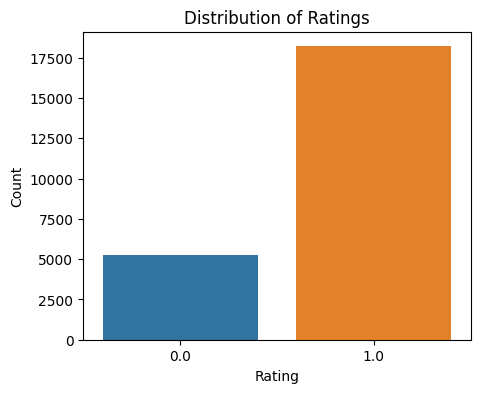

In [57]:
# Distribution of Ratings
plt.figure(figsize=(5, 4))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

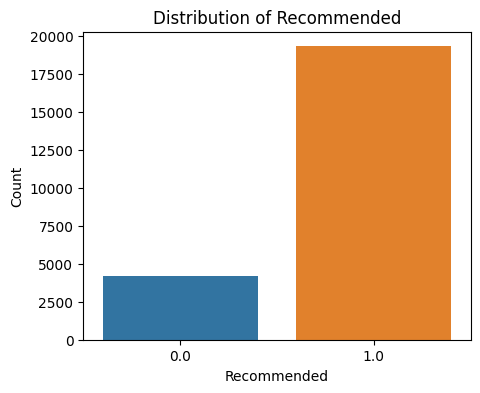

In [58]:
# Distribution of Recommended IND
plt.figure(figsize=(5, 4))
sns.countplot(x='Recommended', data=df)
plt.title('Distribution of Recommended')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()

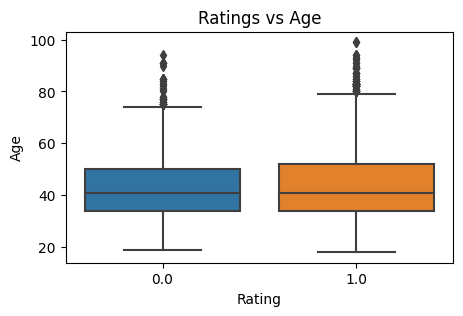

In [59]:
# Ratings vs Age
plt.figure(figsize=(5, 3))
sns.boxplot(x='Rating', y='Age', data=df)
plt.title('Ratings vs Age')
plt.xlabel('Rating')
plt.ylabel('Age')
plt.show()

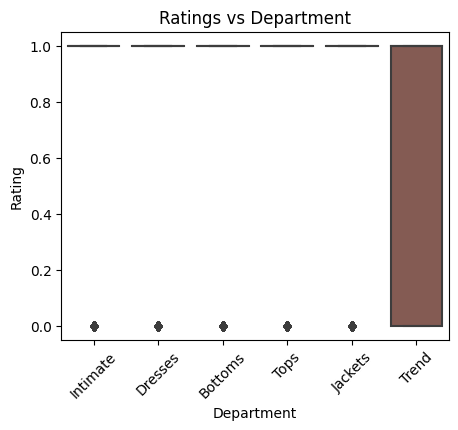

In [60]:
# Ratings vs Department Name
plt.figure(figsize=(5, 4))
sns.boxplot(x='Department', y='Rating', data=df)
plt.title('Ratings vs Department')
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Rating')
plt.show()

<ipython-input-61-62d38263a98a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


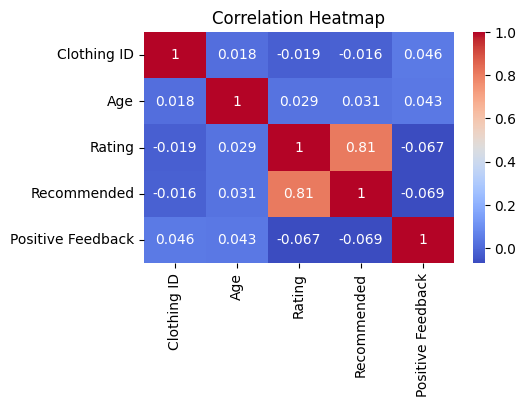

In [61]:
# Correlation heatmap
plt.figure(figsize=(5, 3))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **Recommend Clothing_ID**

In [62]:
average_ratings = df.groupby('Clothing ID')['Rating'].mean()

In [64]:
# Perform sentiment analysis on review text
cv = CountVectorizer(lowercase = True, analyzer='word', ngram_range=(2,3), stop_words='english', max_features=5000)
X_train = cv.fit_transform(df['Review'])
classifier = MultinomialNB()
classifier.fit(X_train, df['Recommended'])
df['Sentiment'] = classifier.predict(X_train)

In [65]:
# Calculate cosine similarity between items based on ratings
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(df.pivot_table(index='Clothing ID', columns='Sentiment', values='Rating', fill_value=0))

In [66]:
def recommend_items(user_item_id):
    positive_reviews = df[(df['Clothing ID'] != user_item_id) & (df['Sentiment'] == 1)]
    similar_items = item_similarity[user_item_id].argsort()[-5:][::-1]
    recommended_items = positive_reviews[positive_reviews['Clothing ID'].isin(similar_items)]['Clothing ID'].unique()
    return recommended_items

In [67]:
user_item_id = 847  # Replace with an actual clothing ID
recommended_items = recommend_items(user_item_id)

print("Recommended Clothing IDs based on positive sentiment reviews and item similarity:")
print(recommended_items)

Recommended Clothing IDs based on positive sentiment reviews and item similarity:
[ 458.  445. 1205.  459.  461.]
